### K-Nearest Neighbors - Scikit

    ### Customer Data - IBM Coursera Data Science Specialization

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('C:\\Users\\drrak\\Downloads\\teleCust1000t.csv')

In [4]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [5]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [6]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
region     1000 non-null int64
tenure     1000 non-null int64
age        1000 non-null int64
marital    1000 non-null int64
address    1000 non-null int64
income     1000 non-null float64
ed         1000 non-null int64
employ     1000 non-null int64
retire     1000 non-null float64
gender     1000 non-null int64
reside     1000 non-null int64
custcat    1000 non-null int64
dtypes: float64(2), int64(10)
memory usage: 93.8 KB


    ## Just a note: This data set is pretty clean - prepared to go directly into KNN implementation

In [8]:
# feature
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values

In [9]:
# label 
y = df['custcat'].values

In [10]:
X

array([[ 2., 13., 44., ...,  0.,  0.,  2.],
       [ 3., 11., 33., ...,  0.,  0.,  6.],
       [ 3., 68., 52., ...,  0.,  1.,  2.],
       ...,
       [ 3., 67., 59., ...,  0.,  1.,  1.],
       [ 3., 70., 49., ...,  0.,  1.,  1.],
       [ 3., 50., 36., ...,  0.,  1.,  3.]])

In [11]:
y

array([1, 4, 3, 1, 3, 3, 2, 4, 3, 2, 1, 3, 1, 4, 1, 2, 3, 3, 1, 4, 2, 1,
       4, 1, 3, 3, 4, 3, 1, 2, 2, 4, 3, 2, 4, 2, 4, 3, 3, 3, 3, 3, 1, 4,
       3, 2, 2, 4, 1, 3, 1, 2, 4, 1, 1, 1, 2, 1, 3, 2, 3, 4, 1, 4, 4, 1,
       3, 3, 1, 1, 1, 2, 1, 2, 3, 1, 3, 1, 3, 4, 4, 1, 4, 3, 2, 1, 2, 4,
       4, 3, 2, 1, 2, 4, 1, 4, 3, 2, 3, 2, 4, 3, 3, 2, 2, 2, 1, 4, 1, 2,
       2, 2, 1, 2, 3, 1, 3, 3, 3, 1, 1, 1, 1, 2, 1, 2, 4, 2, 2, 4, 3, 1,
       4, 2, 3, 1, 1, 3, 3, 4, 4, 3, 4, 2, 3, 1, 4, 2, 2, 2, 1, 3, 4, 4,
       4, 3, 1, 1, 2, 3, 3, 3, 1, 3, 2, 2, 4, 1, 1, 2, 4, 1, 4, 1, 2, 1,
       3, 4, 4, 1, 4, 1, 2, 2, 2, 1, 1, 2, 3, 3, 1, 4, 2, 3, 4, 1, 1, 3,
       1, 4, 1, 4, 2, 2, 4, 1, 3, 4, 3, 3, 1, 1, 1, 2, 2, 1, 3, 4, 4, 1,
       3, 4, 1, 3, 1, 4, 4, 1, 3, 3, 3, 3, 2, 1, 4, 2, 4, 4, 1, 4, 1, 4,
       3, 2, 1, 3, 2, 1, 1, 2, 1, 4, 2, 2, 4, 3, 2, 1, 4, 4, 4, 1, 3, 2,
       1, 1, 3, 3, 3, 1, 3, 2, 4, 1, 3, 2, 2, 3, 3, 1, 4, 4, 3, 2, 3, 3,
       4, 3, 3, 2, 4, 3, 2, 3, 4, 4, 3, 1, 4, 2, 3,

    ## Splitting data set into train and test

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

    ## Preprocessing data/feature scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
X_train = scaler.fit_transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 11)
(300, 11)
(700,)
(300,)


    ### Import KNN Classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
# starting with 4 clusters
k = 4

#Train Model
neighbor_4 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neighbor_4

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [37]:
# Predict
yhat_4 = neighbor_4.predict(X_test)
yhat_4[0:10]

array([4, 4, 1, 3, 4, 3, 4, 3, 1, 2], dtype=int64)

In [38]:
# Testing accuracy of the model
from sklearn import metrics

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neighbor_4.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_4))

Train set Accuracy:  0.5657142857142857
Test set Accuracy:  0.33666666666666667


    ## Let's try 6 clusters

In [39]:
# starting with 6 clusters
k = 6

#Train Model
neighbor_6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neighbor_6

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [40]:
#Predict
yhat_6 = neighbor.predict(X_test)
yhat_6[0:10]

array([4, 4, 1, 3, 4, 3, 4, 3, 1, 2], dtype=int64)

In [41]:
# Accuracy with k = 6
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neighbor_6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_6))

Train set Accuracy:  0.5328571428571428
Test set Accuracy:  0.33666666666666667


In [42]:
# Let's try 8 clusters
k = 8

#Train Model 
neighbor_8 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neighbor_8

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [43]:
# Predict
yhat_8 = neighbor_8.predict(X_test)
yhat_8[0:10]

array([4, 4, 2, 3, 1, 3, 1, 3, 1, 2], dtype=int64)

In [44]:
# Accuracy when k = 8
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neighbor_8.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_8))

Train set Accuracy:  0.4942857142857143
Test set Accuracy:  0.36


    ## Looks like accuracy in training set is going down compared to k =6

    ## Let's Create a visualization that covers for a range of K values

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [46]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neighbor = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neighbor.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.28666667, 0.30333333, 0.32666667, 0.33666667, 0.37666667,
       0.37      , 0.36333333, 0.36      , 0.35666667])

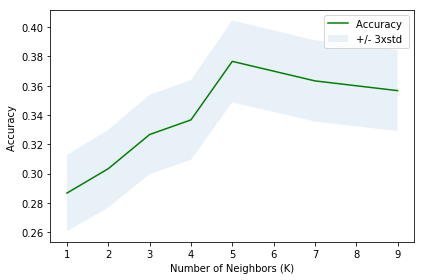

In [48]:
#Plot No. of K's to Accuracy
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)


plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

    ## K = 5 is possibly the best number of clusters for this data set